In [28]:
import math
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [20]:
home_prices = pd.read_csv("data/home_price_change_between_2010_2020.csv", usecols=["RegionName", "home_price_change", "home_price_change_percent"])
home_prices = home_prices.rename(columns={"RegionName":"zipcode"})

In [10]:
age_sex_race_2015 = pd.read_csv("data/age_sex_race_ACS_2015_cleaned.csv")
age_sex_race_2015

educ_2015 = pd.read_csv("data/educational_attainment_ACS_2015_cleaned.csv", usecols=["zipcode", "total_pop_2015", "college_pop_2015", "college_percent_2015"])
educ_2015

data_2015 = pd.merge(age_sex_race_2015, educ_2015)
data_2015

,zipcode,male_2015,white_2015,median_age_2015,total_pop_2015,college_pop_2015,college_percent_2015
0,60002,0.52,0.93,40.60,35087.0,9861.0,0.28
1,60004,0.48,0.85,41.80,75286.0,40022.0,0.53
2,60005,0.50,0.84,42.50,45452.0,22056.0,0.49
3,60007,0.49,0.82,42.80,51689.0,18480.0,0.36
4,60008,0.48,0.71,37.20,32497.0,9484.0,0.29
...,...,...,...,...,...,...,...
1378,62996,0.50,0.79,53.20,684.0,66.0,0.10
1379,62997,0.42,0.99,38.90,638.0,10.0,0.02
1380,62998,0.53,1.00,59.10,473.0,12.0,0.03
1381,62999,0.51,0.99,37.70,2501.0,261.0,0.10


In [11]:
age_sex_race_2019 = pd.read_csv("data/age_sex_race_ACS_2019_cleaned.csv")
age_sex_race_2019

educ_2019 = pd.read_csv("data/educational_attainment_ACS_2019_cleaned.csv", usecols=["zipcode", "total_pop_2019", "college_pop_2019", "college_percent_2019"])
educ_2019

data_2019 = pd.merge(age_sex_race_2019, educ_2019)
data_2019

,zipcode,male_2019,white_2019,median_age_2019,total_pop_2019,college_pop_2019,college_percent_2019
0,60002,0.50,0.91,43.30,35142.0,11452.0,0.33
1,60004,0.48,0.84,43.00,75641.0,43973.0,0.58
2,60005,0.51,0.83,44.40,46307.0,23208.0,0.50
3,60007,0.48,0.83,43.80,51855.0,18224.0,0.35
4,60008,0.50,0.74,37.80,32249.0,11018.0,0.34
...,...,...,...,...,...,...,...
1377,62996,0.48,0.74,42.80,775.0,156.0,0.20
1378,62997,0.51,1.00,32.90,772.0,52.0,0.07
1379,62998,0.50,1.00,35.90,478.0,82.0,0.17
1380,62999,0.49,0.97,37.30,2488.0,208.0,0.08


In [19]:
change_data = pd.merge(pd.merge(data_2015, data_2019), home_prices)
change_data = change_data.astype('float64')
change_data.dtypes

new_cols = ["male","white","median_age","college_percent"]

#change_data["male_change"] = change_data.loc[:, "median_age_2019"] - change_data.loc[:, "median_age_2015"]
for i in new_cols:
    change_data[i+"_change"] = (change_data.loc[:, i+"_2019"] - change_data.loc[:, i+"_2015"])/change_data.loc[:, i+"_2015"]

change_data = change_data.dropna()

change_data.head()

,zipcode,male_2015,white_2015,median_age_2015,total_pop_2015,college_pop_2015,college_percent_2015,male_2019,white_2019,median_age_2019,total_pop_2019,college_pop_2019,college_percent_2019,home_price_change,home_price_change_percent,male_change,white_change,median_age_change,college_percent_change
0,60601.0,0.51,0.71,36.2,20688.0,15785.0,0.76,0.47,0.73,33.6,26230.0,21910.0,0.84,0.056643,5.664282,-0.078431,0.028169,-0.071823,0.105263
1,60602.0,0.50,0.85,25.9,2221.0,1504.0,0.68,0.56,0.64,34.1,1903.0,1789.0,0.94,0.113623,11.362279,0.120000,-0.247059,0.316602,0.382353
4,60605.0,0.48,0.60,32.7,44023.0,30963.0,0.70,0.45,0.63,33.6,49106.0,34798.0,0.71,0.153472,15.347238,-0.062500,0.050000,0.027523,0.014286
5,60606.0,0.51,0.77,31.5,5561.0,5107.0,0.92,0.51,0.71,36.3,6159.0,5713.0,0.93,0.148591,14.859117,0.000000,-0.077922,0.152381,0.010870
6,60607.0,0.50,0.60,30.3,43061.0,29610.0,0.69,0.50,0.59,30.2,45917.0,32524.0,0.71,0.290457,29.045733,0.000000,-0.016667,-0.003300,0.028986


<BarContainer object of 54 artists>

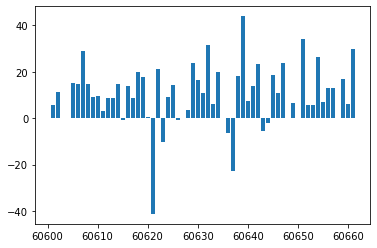

In [30]:
change_data = change_data.sort_values("home_price_change_percent") #sort change in home prices in ascending order

fig, ax = plt.subplots()

y_ax = np.array(change_data['home_price_change_percent'])
x_ax = np.array(change_data["zipcode"])
#x_ax = range(len(change_data['home_price_change_percent']))

ax.bar(x_ax, y_ax)

In [25]:
change_data['home_price_change_percent'].describe()

count    54.000000
mean     11.038262
std      13.585594
min     -41.298622
25%       5.893871
50%      11.188944
75%      17.899045
max      43.954938
Name: home_price_change_percent, dtype: float64

The highest change in home prices is 43.95%, and this is in zipcode 60639. The lowest change (most negative) in home prices is -41.29%, and this is in zipcode 60621.

In [43]:
change_data[["male_change", "white_change", "median_age_change", "college_percent_change"]].describe()

,male_change,white_change,median_age_change,college_percent_change
count,54.000000,54.000000,54.000000,54.000000
mean,0.003445,0.120296,0.033108,0.133410
std,0.035975,0.353610,0.060753,0.145550
min,-0.078431,-0.247059,-0.071823,-0.176471
25%,-0.020306,-0.025183,0.000663,0.039044
50%,0.000000,0.005618,0.019554,0.103914
75%,0.020408,0.116667,0.038244,0.190616
max,0.120000,2.000000,0.316602,0.666667


In [35]:
train = change_data.iloc[:40]
test = change_data.iloc[40:]

In [44]:
X = np.array(train[["male_change", "white_change", "median_age_change", "college_percent_change"]])
y = np.array(train["home_price_change_percent"])
model = LinearRegression().fit(X, y)


r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

coefficient of determination: 0.17158207068220865
intercept: 10.035233582489628
slope: [ 13.81504412  -3.93741661   1.56428335 -29.70748188]


In [48]:
y_hat = 10.035233582489628 + 13.81504412*train['male_change'] + -3.93741661*train["white_change"] + 1.56428335*train["median_age_change"] + -29.70748188*train["college_percent_change"]

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mean_squared_error(train["home_price_change_percent"], y_hat)

102.03364106986339

In [54]:
y_hat_test = 10.035233582489628 + 13.81504412*test['male_change'] + -3.93741661*test["white_change"] + 1.56428335*test["median_age_change"] + -29.70748188*test["college_percent_change"]

In [56]:
mean_squared_error(test["home_price_change_percent"], y_hat_test)

510.4463699614198